 VOTING CLASSIFIER

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numbers as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor

In [39]:
x , y = make_moons(n_samples=1000 , noise=0.2)

In [40]:
df = {"x1":x[:,0] , "x2":x[:,1] , "y":y}

In [41]:
new_df = pd.DataFrame(df)

In [42]:
new_df

,x1,x2,y
0,1.433436,-0.056479,1
1,1.321139,-0.393945,1
2,0.593138,-0.112458,0
3,1.926391,0.906046,1
4,1.331670,-0.313333,1
...,...,...,...
995,0.569583,-0.521946,1
996,0.854854,-0.370284,1
997,-0.121394,-0.338285,1
998,-0.314157,0.728132,0


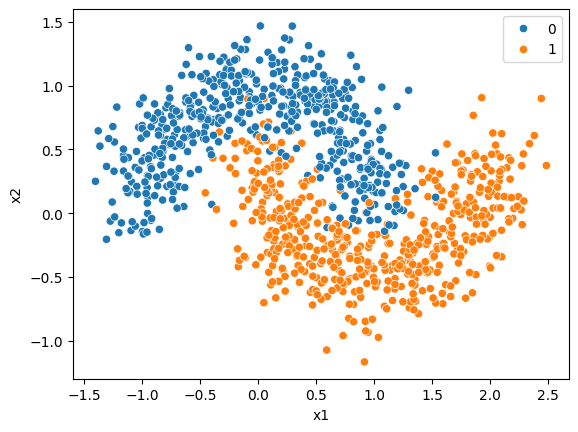

In [43]:
sns.scatterplot(x="x1" , y="x2" , data=new_df , hue=y)
plt.show()

In [44]:
x_a = new_df.iloc[: , :-1]
y_a = new_df["y"]

In [45]:
x_train , x_test, y_train, y_test = train_test_split(x_a , y_a , test_size=0.2 , random_state=42)

In [46]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

FIRST MODEL USING DECISON TREE

In [52]:
dt = DecisionTreeClassifier()
dt.fit(x_train , y_train)
dt.score(x_train , y_train)*100 , dt.score(x_test , y_test)*100

(100.0, 94.5)

SECOND MODEL USING SVC

In [51]:
sv = SVC()
sv.fit(x_train , y_train)
sv.score(x_train , y_train)*100 , sv.score(x_test , y_test)*100

(95.75, 94.5)

THIRD MODEL USING GaussianNB

In [53]:
gnb = GaussianNB()
gnb.fit(x_train , y_train)
gnb.score(x_train , y_train)*100 , sv.score(x_test , y_test)*100

(86.625, 94.5)

ENSEMBLE LEARNING MODEL BEST THAN THESE MODELS

In [54]:
from sklearn.ensemble import VotingClassifier


In [58]:
li = [("dt1",  DecisionTreeClassifier()) , ("sv1" , SVC()) , ("gnb1" , GaussianNB())]

In [63]:
vc = VotingClassifier(li , weights=[100  , 4, 7])
vc.fit(x_train , y_train)

VotingClassifier(estimators=[('dt1', DecisionTreeClassifier()), ('sv1', SVC()),
                             ('gnb1', GaussianNB())],
                 weights=[100, 4, 7])

In [64]:
vc.score(x_train , y_train)*100 , vc.score(x_test , y_test)*100

(100.0, 95.0)

In [68]:
prd = {"dt":dt.predict(x_test) , "svm" :sv.predict(x_test) , "gnb": gnb.predict(x_test) , "vc":vc.predict(x_test)}

In [69]:
pd.DataFrame(prd)

,dt,svm,gnb,vc
0,0,0,0,0
1,1,0,1,1
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
195,0,0,0,0
196,1,1,1,1
197,0,0,0,0
198,1,1,1,1
